In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2003~2024년 데이터 전처리
=>  전국 관객수 10000명 기준으로 리사이징

In [ ]:
# 데이터 값 읽어오기
data_file = "./KOBIS_개봉일람_2023-03-23.csv"
df = pd.read_csv(data_file, encoding='UTF-8',index_col = "순번")

### 생략된 내용을 추가로 보는 코드

In [ ]:
# row 생략 없이 출력
pd.set_option('display.max_rows', 200)
# col 생략 없이 출력
pd.set_option('display.max_columns', 200)

In [ ]:
# 널값 확인
df.isnull()

,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분
순번,,,,,,,,,,,,,,,,,
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19900,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
19901,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
19902,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# 빈값 확인

df.isnull().sum()

영화명            0
감독          1298
제작사        12618
수입사         8178
배급사           76
개봉일            2
영화유형           0
영화형태           1
국적             1
전국 스크린수        0
전국 매출액        44
전국 관객수         0
서울 매출액        50
서울 관객수         0
장르            71
등급             5
영화구분           0
dtype: int64

In [ ]:
# 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19904 entries, 1 to 19904
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   영화명      19904 non-null  object
 1   감독       18606 non-null  object
 2   제작사      7286 non-null   object
 3   수입사      11726 non-null  object
 4   배급사      19828 non-null  object
 5   개봉일      19902 non-null  object
 6   영화유형     19904 non-null  object
 7   영화형태     19903 non-null  object
 8   국적       19903 non-null  object
 9   전국 스크린수  19904 non-null  object
 10  전국 매출액   19860 non-null  object
 11  전국 관객수   19904 non-null  object
 12  서울 매출액   19854 non-null  object
 13  서울 관객수   19904 non-null  object
 14  장르       19833 non-null  object
 15  등급       19899 non-null  object
 16  영화구분     19904 non-null  object
dtypes: object(17)
memory usage: 2.7+ MB


In [ ]:
# 제작사, 수입사는 결측치가 너무 많아, drop
# 나머지 결측치는 기타로 변경

df = df.drop(['제작사', '수입사'], axis=1)
df['감독'].fillna('기타', inplace=True)
df['장르'].fillna('기타', inplace=True)
df['배급사'].fillna('기타', inplace=True)
df['영화형태'].fillna('기타', inplace=True)

# 한개가 결측치가 나와서 기타로 치환
df['국적'].fillna('기타', inplace=True)

# 서울 매출액 결측치 제거(사용을 안하니깨문에 0으로 변경)
df['서울 매출액'].fillna(0, inplace=True)
# 남은 결측치 제거

for i in df['개봉일'][df['개봉일'].isnull()].index:
    df = df.drop(i)

for i in df['전국 매출액'][df['전국 매출액'].isnull()].index:
    df = df.drop(i)

for i in df['등급'][df['등급'].isnull()].index:
    df = df.drop(i)

In [ ]:
# 최종확인

df.isnull().sum()

영화명        0
감독         0
배급사        0
개봉일        0
영화유형       0
영화형태       0
국적         0
전국 스크린수    0
전국 매출액     0
전국 관객수     0
서울 매출액     0
서울 관객수     0
장르         0
등급         0
영화구분       0
dtype: int64

In [ ]:
# 범주형 데이터 값 확인

category_cols = ['영화명','감독', '배급사', '영화유형','영화형태','국적','장르','등급','영화구분',]

# 범주형 데이터의 unique 확인
for col in category_cols:
    print('컬럼 [{}] UNIQUE : {}'.format(col, len(df[col].unique())))

컬럼 [영화명] UNIQUE : 19484
컬럼 [감독] UNIQUE : 7876
컬럼 [배급사] UNIQUE : 1357
컬럼 [영화유형] UNIQUE : 1
컬럼 [영화형태] UNIQUE : 4
컬럼 [국적] UNIQUE : 72
컬럼 [장르] UNIQUE : 21
컬럼 [등급] UNIQUE : 18
컬럼 [영화구분] UNIQUE : 2


In [ ]:
# 다수의 감독 데이터 변경
for idx, row in df.iterrows():
    if ',' in row['감독']:
        directors = row['감독'].split(',')
        # 양 끝 공백 제거 후 정렬
        directors.sort(key=lambda x : x.strip())
        df['감독'][idx] = directors[0].strip()

In [ ]:
# 다수의 배급사를 앞에 있는 배급사로 취급

for idx, row in df.iterrows():
    if ',' in row['배급사']:
        distributor = row['배급사'].split(',')
        # 양 끝 공백 제거 후 변경
        df['배급사'][idx] = distributor[0].strip()

In [ ]:
# 영화유형은 두개 뿐이라 제거

df.drop('영화유형', axis=1, inplace=True)

In [ ]:
# 등급 데이터 전처리

for idx, row in df.iterrows():
    if ',' in row['등급']:
        ratings = row['등급'].split(',')
        # 전체, 12, 15, 청소년관람불가 순
        if '전체' in ratings:
            df['등급'][idx] = '전체관람가'
        elif '12' in ratings:
            df['등급'][idx] = '12세관람가'
        elif '15' in ratings:
            df['등급'][idx] = '15세관람가'
        else:
            df['등급'][idx] = '청소년관람불가'
    elif df['등급'][idx] == '18세관람가' or df['등급'][idx] == '제한상영가': 
        df['등급'][idx] = '청소년관람불가'
    else:
        df['등급'][idx] = df['등급'][idx].replace('이상', '')

In [ ]:
df.info()

In [ ]:
# 전국 매출액, 스크린 수, 관객수를 확인을 위해 int형으로 변경

df['전국 매출액'] = df['전국 매출액'].str.replace(pat=r',', repl=r'', regex=True)
df['전국 매출액'] = df['전국 매출액'].astype('int64')

df['전국 스크린수'] = df['전국 스크린수'].str.replace(pat=r',', repl=r'', regex=True)
df['전국 스크린수'] = df['전국 스크린수'].astype('int64')

df['전국 관객수'] = df['전국 관객수'].str.replace(pat=r',', repl=r'', regex=True)
df['전국 관객수'] = df['전국 관객수'].astype('int64')


In [ ]:
# 변경 확인
df.info()

In [ ]:
# 스크린 수로 하였으나, 몇몇 역대 영화들이 사라져서 전국 관객수 10000명 기준으로 변경

movie_resize = df[(df['전국 관객수'] > 10000)]
movie_resize.info()

In [ ]:
# 값 내보내기
movie_resize.to_csv('./movie_resize2.csv',index=False, encoding="utf-8-sig")

### 배급사 추가로 변경 더 해야 해

In [ ]:
# 점수 처리를 위해 변경

movie_resize['배급사'] = movie_resize['배급사'].str.replace('CJ ENM','(주)씨제이이엔엠')

In [ ]:
# 국적 데이터 변경
for idx, row in movie_resize.iterrows():
    if  row['국적'] not in ['미국', '한국', '일본', '영국', '프랑스','중국','독일']:
        movie_resize['국적'][idx] = '기타'

In [ ]:
# 값 확인

movie_resize['국적'].value_counts()

# 리사이징 된 데이터 불러오기

In [ ]:
# 리사이징 된 데이터 불러오기
df = pd.read_csv('./movie_resize2.csv',index_col=0,encoding='UTF-8')
df.reset_index(drop=False,inplace=True)
df

# 전국 관객수 표준화 하기
년도별 전국관객수 

In [ ]:
df.head()

,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분
0,명량,김한민,(주)씨제이이엔엠,2014-07-30,장편,한국,1587,135748398910,17613682,"33,121,225,810","4,163,666",사극,15세관람가,일반영화
1,극한직업,이병헌,(주)씨제이이엔엠,2019-01-23,장편,한국,1978,139647979516,16264944,"31,858,660,536","3,638,287",코미디,15세관람가,일반영화
2,신과함께-죄와 벌,김용화,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,장편,한국,1912,115698654137,14410754,"27,530,825,087","3,346,172",판타지,12세관람가,일반영화
3,국제시장,윤제균,(주)씨제이이엔엠,2014-12-17,장편,한국,966,110828014630,14245998,"25,842,519,330","3,233,946",드라마,12세관람가,일반영화
4,어벤져스: 엔드게임,안소니 루소,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,장편,미국,2835,122182694160,13934592,"33,577,136,860","3,597,963",액션,12세관람가,일반영화


# top200 데이터 추출

In [ ]:
# top200 만듬

col = ['순번','영화명','감독','배급사','개봉일']
movie_resize.reset_index(drop=False,inplace=True)
movie_resize[col][:200].to_csv('./movie_resize_ranking.csv', encoding="utf-8-sig")

In [ ]:
# top 200 불러오기

movie_resize_ranking = pd.read_csv('./movie_resize_ranking.csv',index_col='순번',encoding='UTF-8')
movie_resize_ranking.drop('Unnamed: 0', axis=1, inplace=True)
movie_resize_ranking

# 감독 점수화 하기

In [ ]:
# 점수화를 위해 개봉일을 datetime 타입으로 변경

movie_resize_ranking['개봉일'] = movie_resize_ranking['개봉일'].astype('datetime64')

In [ ]:
# 점수화행 만들기

import datetime

df['개봉일'] = df['개봉일'].astype('datetime64')

movie_final = df.copy()
movie_final['감독_흥행'] = [0 for _ in range(len(df))]
movie_final['배급사_흥행'] = [0 for _ in range(len(df))]
movie_final['주연배우_흥행'] = [0 for _ in range(len(df))]

In [ ]:
# 순번을 쓰기 위해 인덱스 풀기

movie_resize_ranking.reset_index(drop=False,inplace=True)

In [ ]:
movie_final.head()

,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분,감독_흥행,배급사_흥행,주연배우_흥행
0,명량,김한민,(주)씨제이이엔엠,2014-07-30,장편,한국,1587,135748398910,17613682,"33,121,225,810","4,163,666",사극,15세관람가,일반영화,0,0,0
1,극한직업,이병헌,(주)씨제이이엔엠,2019-01-23,장편,한국,1978,139647979516,16264944,"31,858,660,536","3,638,287",코미디,15세관람가,일반영화,0,0,0
2,신과함께-죄와 벌,김용화,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,장편,한국,1912,115698654137,14410754,"27,530,825,087","3,346,172",판타지,12세관람가,일반영화,0,0,0
3,국제시장,윤제균,(주)씨제이이엔엠,2014-12-17,장편,한국,966,110828014630,14245998,"25,842,519,330","3,233,946",드라마,12세관람가,일반영화,0,0,0
4,어벤져스: 엔드게임,안소니 루소,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,장편,미국,2835,122182694160,13934592,"33,577,136,860","3,597,963",액션,12세관람가,일반영화,0,0,0


In [ ]:
# 점수 구하는 코드

for idx, row in movie_final.iterrows():
    # 개봉일 기준
    open = datetime.datetime.strftime(row['개봉일'], '%Y-%m-%d')
    director = row['감독'].strip()
    # Top300 중 개봉일 이전 영화의 감독 확인
    directors = movie_resize_ranking[(movie_resize_ranking['개봉일'] < open) & (movie_resize_ranking['감독'] == director)]
    # 해당 감독이 있다면 흥행 여부 표시
    if len(directors) > 0:
        # 점수 셋팅
        score = 0
        for i in directors['순번']:
            if i >= 181:
                score += 1
            elif i >= 161:
                score += 2
            elif i >= 141:
                score += 3
            elif i >= 121:
                score += 4
            elif i >= 101:
                score += 5
            elif i >= 81:
                score += 6
            elif i >= 61:
                score += 7
            elif i >= 41:
                score += 8
            elif i >= 21:
                score += 9
            else:
                score += 10
            movie_final.loc[idx, '감독_흥행'] = score

In [ ]:
for idx, row in movie_final.iterrows():
    # 개봉일 기준
    open = datetime.datetime.strftime(row['개봉일'], '%Y-%m-%d')
    director = row['배급사'].strip()
    # Top300 중 개봉일 이전 영화의 감독 확인
    directors = movie_resize_ranking[(movie_resize_ranking['개봉일'] < open) & (movie_resize_ranking['배급사'] == director)]
    # 해당 감독이 있다면 흥행 여부 표시
    if len(directors) > 0:
        # 점수 셋팅
        score = 0
        for i in directors['순번']:
            if i >= 181:
                score += 1
            elif i >= 161:
                score += 2
            elif i >= 141:
                score += 3
            elif i >= 121:
                score += 4
            elif i >= 101:
                score += 5
            elif i >= 81:
                score += 6
            elif i >= 61:
                score += 7
            elif i >= 41:
                score += 8
            elif i >= 21:
                score += 9
            else:
                score += 10
            movie_final.loc[idx, '배급사_흥행'] = score

In [ ]:
# 값 확인
(movie_final['배급사_흥행'] == 0).value_counts()

True     2811
False    2024
Name: 배급사_흥행, dtype: int64

In [ ]:
# 날짜 데이터를 datetime으로 변경

import datetime
movie_final['연도'] = movie_final['개봉일'].dt.year
movie_final['월'] = movie_final['개봉일'].dt.month

movie_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   순번       4835 non-null   int64         
 1   영화명      4835 non-null   object        
 2   감독       4835 non-null   object        
 3   배급사      4835 non-null   object        
 4   개봉일      4835 non-null   datetime64[ns]
 5   영화형태     4835 non-null   object        
 6   국적       4835 non-null   object        
 7   전국 스크린수  4835 non-null   int64         
 8   전국 매출액   4835 non-null   int64         
 9   전국 관객수   4835 non-null   int64         
 10  서울 매출액   4835 non-null   object        
 11  서울 관객수   4835 non-null   object        
 12  장르       4835 non-null   object        
 13  등급       4835 non-null   object        
 14  영화구분     4835 non-null   object        
 15  감독_흥행    4835 non-null   int64         
 16  배급사_흥행   4835 non-null   int64         
 17  주연배우_흥행  4835 non-null   int64   

In [ ]:
# 시즌 데이터 변경

season = {12 : '겨울',
          1 : '겨울',
          2 : '겨울',
          3 : '봄',
          4 : '봄',
          5 : '봄',
          6 : '여름',
          7 : '여름',
          8 : '여름',
          9 : '가을',
          10 : '가을',
          11 : '가을'}

movie_final['계절'] = movie_final[['월']].apply(lambda x : x.map(season))

In [ ]:

movie_final

,순번,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분,감독_흥행,배급사_흥행,주연배우_흥행,연도,월,계절
0,1,명량,김한민,(주)씨제이이엔엠,2014-07-30,장편,한국,1587,135748398910,17613682,"33,121,225,810","4,163,666",사극,15세관람가,일반영화,8,181,0,2014,7,여름
1,2,극한직업,이병헌,(주)씨제이이엔엠,2019-01-23,장편,한국,1978,139647979516,16264944,"31,858,660,536","3,638,287",코미디,15세관람가,일반영화,0,272,0,2019,1,겨울
2,3,신과함께-죄와 벌,김용화,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,장편,한국,1912,115698654137,14410754,"27,530,825,087","3,346,172",판타지,12세관람가,일반영화,16,64,0,2017,12,겨울
3,4,국제시장,윤제균,(주)씨제이이엔엠,2014-12-17,장편,한국,966,110828014630,14245998,"25,842,519,330","3,233,946",드라마,12세관람가,일반영화,11,191,0,2014,12,겨울
4,5,어벤져스: 엔드게임,안소니 루소,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,장편,미국,2835,122182694160,13934592,"33,577,136,860","3,597,963",액션,12세관람가,일반영화,20,74,0,2019,4,봄
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,4863,나의 어머니,난니 모레티,(주)티캐스트,2015-08-20,장편,기타,30,76569151,10031,"59,303,651","7,301",드라마,12세관람가,독립/예술영화,0,0,0,2015,8,여름
4831,4864,타이페이 카페 스토리,샤오 야 췐,찬란,2011-07-07,장편,기타,10,76832900,10023,"58,237,900","7,316",드라마,전체관람가,독립/예술영화,0,0,0,2011,7,여름
4832,4865,테라 3D: 인류 최후의 전쟁,아리스토메니스 치바스,주식회사 마운틴픽쳐스,2010-11-04,장편,미국,48,106210549,10023,"44,666,000","4,216",애니메이션,전체관람가,일반영화,0,0,0,2010,11,가을
4833,4866,글로리아 벨,세바스찬 렐리오,소니픽쳐스엔터테인먼트코리아주식회사극장배급지점,2019-06-06,장편,미국,48,77962520,10021,"46,754,220","5,790",드라마,15세관람가,독립/예술영화,0,9,0,2019,6,여름


In [ ]:
movie_final.head()

,순번,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분,감독_흥행,배급사_흥행,주연배우_흥행,연도,월,계절
0,1,명량,김한민,(주)씨제이이엔엠,2014-07-30,장편,한국,1587,135748398910,17613682,"33,121,225,810","4,163,666",사극,15세관람가,일반영화,8,181,0,2014,7,여름
1,2,극한직업,이병헌,(주)씨제이이엔엠,2019-01-23,장편,한국,1978,139647979516,16264944,"31,858,660,536","3,638,287",코미디,15세관람가,일반영화,0,272,0,2019,1,겨울
2,3,신과함께-죄와 벌,김용화,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,장편,한국,1912,115698654137,14410754,"27,530,825,087","3,346,172",판타지,12세관람가,일반영화,16,64,0,2017,12,겨울
3,4,국제시장,윤제균,(주)씨제이이엔엠,2014-12-17,장편,한국,966,110828014630,14245998,"25,842,519,330","3,233,946",드라마,12세관람가,일반영화,11,191,0,2014,12,겨울
4,5,어벤져스: 엔드게임,안소니 루소,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,장편,미국,2835,122182694160,13934592,"33,577,136,860","3,597,963",액션,12세관람가,일반영화,20,74,0,2019,4,봄


In [ ]:
# 원핫인코딩

movie_labels = pd.get_dummies(movie_final,columns = ['국적','장르','등급','계절'])

In [ ]:
# 사용하지 않는 컬럼 제거

not_used = ['영화명', '감독', '배급사','영화형태','개봉일','전국 스크린수', '전국 매출액','서울 매출액','서울 관객수','영화구분','연도','월','순번','주연배우_흥행']

movie_DL = movie_labels.drop(not_used, axis=1)

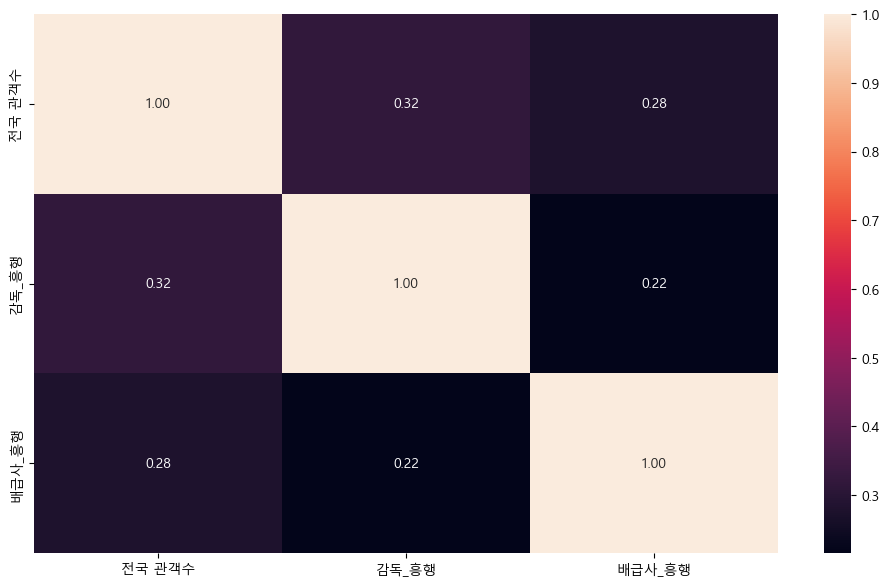

In [ ]:
# 사용하는 수치형 데이터 히트맵

digital_cols2 = ['전국 관객수','감독_흥행', '배급사_흥행']
plt.rcParams['font.family'] ='Malgun Gothic'

plt.rcParams['axes.unicode_minus'] =False
plt.figure(figsize=(12, 7))
sns.heatmap(movie_DL[digital_cols2].corr(), annot=True, fmt='.2f')
plt.show()

In [ ]:
# 입력 컬럼 확인(값을 하나 빼야한다 => 전국 관객수로 쓰려고)
len(movie_DL.columns)

40

In [ ]:
# 독립 변수와 종속 변수 나눔

독립 = movie_DL[['감독_흥행', '배급사_흥행', '국적_기타', '국적_독일', '국적_미국',
       '국적_영국', '국적_일본', '국적_중국', '국적_프랑스', '국적_한국', '장르_SF', '장르_가족', '장르_공연',
       '장르_공포(호러)', '장르_기타', '장르_다큐멘터리', '장르_드라마', '장르_멜로/로맨스', '장르_뮤지컬',
       '장르_미스터리', '장르_범죄', '장르_사극', '장르_서부극(웨스턴)', '장르_성인물(에로)', '장르_스릴러',
       '장르_애니메이션', '장르_액션', '장르_어드벤처', '장르_전쟁', '장르_코미디', '장르_판타지',
       '등급_12세관람가', '등급_15세관람가', '등급_전체관람가', '등급_청소년관람불가', '계절_가을', '계절_겨울',
       '계절_봄', '계절_여름']] 
종속 = movie_DL[['전국 관객수']] 

In [ ]:
# train, test 데이터 나눔

from sklearn.model_selection import train_test_split
train_input, test_input, train_target,test_target = train_test_split(독립,종속,test_size=0.25,random_state=42)

In [ ]:
# 딥러닝 층 여기가 중요

X = tf.keras.layers.Input(shape=[39])

H = tf.keras.layers.Dense(128)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.swish)(H)

H = tf.keras.layers.Dense(128)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.swish)(H)

H = tf.keras.layers.Dense(128)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.swish)(H)

H = tf.keras.layers.Dense(128)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.swish)(H)


Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X,Y)
sgd = tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.5)
model.compile(optimizer=sgd,loss='MAE')

In [ ]:
# 훈련

model.fit(train_input,train_target,batch_size=128,epochs=10,validation_data=(test_input,test_target))

Epoch 1/100
38/38 [==============================] - 0s 5ms/step - loss: 619277.2500
Epoch 2/100
38/38 [==============================] - 0s 4ms/step - loss: 606993.0000
Epoch 3/100
38/38 [==============================] - 0s 5ms/step - loss: 599592.3125
Epoch 4/100
38/38 [==============================] - 0s 5ms/step - loss: 595743.0625
Epoch 5/100
38/38 [==============================] - 0s 4ms/step - loss: 595327.1250
Epoch 6/100
38/38 [==============================] - 0s 3ms/step - loss: 594885.1250
Epoch 7/100
38/38 [==============================] - 0s 4ms/step - loss: 590020.5625
Epoch 8/100
38/38 [==============================] - 0s 3ms/step - loss: 589700.3125
Epoch 9/100
38/38 [==============================] - 0s 3ms/step - loss: 587818.7500
Epoch 10/100
38/38 [==============================] - 0s 4ms/step - loss: 587813.2500
Epoch 11/100
38/38 [==============================] - 0s 4ms/step - loss: 582806.0000
Epoch 12/100
38/38 [==============================] - 0s 4ms/st

In [ ]:
# 확인용도
model.predict(train_input[:5])

1/1 [==============================] - 0s 137ms/step


array([[28853.379],
       [69694.68 ],
       [28990.406],
       [25120.441],
       [92417.41 ]], dtype=float32)

In [ ]:
# 여기랑 비슷한지 보기
train_target[:5]

,전국 관객수
3247,44231
1161,600067
4262,15576
3071,53744
1743,274628


In [ ]:
# 값 스케일링

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# 랜덤포레스트 돌려보기

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1,random_state=42)
scores = cross_validate(rf,train_input,train_target,return_train_score=True,n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.8170010264946882 0.15534713748275336


In [ ]:
# 중요 특성 뽑기
rf.fit(train_input,train_target)
print(rf.feature_importances_)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_14704\577101422.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_input,train_target)


[1.96813970e-01 3.55908596e-01 0.00000000e+00 7.06708476e-04
 1.74856009e-04 1.74090864e-02 8.54422830e-04 1.60430721e-03
 5.24058985e-04 6.92586489e-04 3.39190989e-02 1.19412744e-02
 5.98020352e-04 8.28959287e-05 2.36682798e-03 2.33287048e-05
 8.91602331e-04 1.99946004e-02 9.04713515e-03 8.90093937e-04
 2.62617167e-03 1.10334319e-02 2.20024349e-02 2.94747967e-03
 1.62065512e-07 2.97657198e-03 8.96384072e-03 3.57557677e-02
 1.13193184e-02 1.56141205e-02 2.16046910e-02 1.63842063e-02
 3.65131739e-02 2.58119565e-02 1.20582740e-02 1.11598456e-02
 2.40559232e-02 3.38250170e-02 1.91485361e-02 3.17556059e-02]


In [ ]:
# 간단한 랜덤포레스트

rf = RandomForestRegressor(n_jobs=-1,oob_score=True)
rf.fit(train_input,train_target)
print(rf.oob_score_)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_14704\762423999.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_input,train_target)


0.14506523696259876


In [ ]:
# 익스트림 ~~
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor(n_jobs=-1,random_state=42)
scores = cross_validate(et,train_input,train_target,return_train_score=True,n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.9188274409933219 -0.0142198884575655


In [ ]:
# 특성 확인
et.fit(train_input,train_target)
print(et.feature_importances_)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_14704\1418952811.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et.fit(train_input,train_target)


[1.80465958e-01 3.22064469e-01 0.00000000e+00 1.71247765e-03
 1.16945937e-04 2.23964121e-02 6.90403527e-04 6.76768643e-04
 5.49644738e-04 5.08610282e-04 4.13213161e-02 1.23125242e-02
 4.26241579e-04 1.87999346e-04 1.96620388e-03 4.37239683e-05
 1.17439397e-03 1.94371957e-02 8.80247740e-03 8.66204932e-04
 3.13151095e-03 9.43041454e-03 2.49148513e-02 3.72997720e-03
 1.39186747e-08 2.22812567e-03 5.10388005e-03 4.33887641e-02
 1.54831642e-02 1.71412258e-02 2.28737404e-02 1.82371194e-02
 4.18198610e-02 2.97802910e-02 1.74316031e-02 1.45242826e-02
 2.78636621e-02 3.39551485e-02 2.21870936e-02 3.10552997e-02]


In [ ]:
# 그레이디션~~

from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)
scores = cross_validate(gb,train_input,train_target,return_train_score=True,n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.5222334360571009 0.2429401676071068


In [ ]:
pip install cmake

Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 33.0/33.0 MB 29.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# xgboost 임

from xgboost import XGBRFRegressor
from sklearn.model_selection import cross_validate

xgb = XGBRFRegressor(tree_method='hist',random_state=42)
scores = cross_validate(xgb,train_input,train_target,return_train_score=True,n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.5113390209278604 0.2258013878224463
